In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')

#### **Exploring Dataset**

In [ ]:
df.head(5)

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [ ]:
df.tail(5)

Name    Year Duration          Genre  Rating Votes  \
15504  Zulm Ko Jala Doonga  (1988)      NaN         Action     4.6    11   
15505                Zulmi  (1999)  129 min  Action, Drama     4.5   655   
15506            Zulmi Raj  (2005)      NaN         Action     NaN   NaN   
15507        Zulmi Shikari  (1988)      NaN         Action     NaN   NaN   
15508         Zulm-O-Sitam  (1998)  130 min  Action, Drama     6.2    20   

            Director           Actor 1         Actor 2        Actor 3  
15504  Mahendra Shah  Naseeruddin Shah   Sumeet Saigal  Suparna Anand  
15505     Kuku Kohli      Akshay Kumar  Twinkle Khanna    Aruna Irani  
15506     Kiran Thej   Sangeeta Tiwari             NaN            NaN  
15507            NaN               NaN             NaN            NaN  
15508   K.C. Bokadia        Dharmendra      Jaya Prada    Arjun Sarja

In [ ]:
df.shape

(15509, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe()

Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

In [ ]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

#### **Preprocessing: Checking missing values**

In [ ]:
df.isnull()

Name   Year  Duration  Genre  Rating  Votes  Director  Actor 1  \
0      False   True      True  False    True   True     False    False   
1      False  False     False  False   False  False     False    False   
2      False  False     False  False    True   True     False    False   
3      False  False     False  False   False  False     False    False   
4      False  False     False  False    True   True     False    False   
...      ...    ...       ...    ...     ...    ...       ...      ...   
15504  False  False      True  False   False  False     False    False   
15505  False  False     False  False   False  False     False    False   
15506  False  False      True  False    True   True     False    False   
15507  False  False      True  False    True   True      True     True   
15508  False  False     False  False   False  False     False    False   

       Actor 2  Actor 3  
0        False    False  
1        False    False  
2        False    False  
3        False    False  
4        False    False  
...        ...      ...  
15504    False    False  
15505    False    False  
15506     True     True  
15507     True     True  
15508    False    False  

[15509 rows x 10 columns]

In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.sample(7).isnull()

Name   Year  Duration  Genre  Rating  Votes  Director  Actor 1  \
8652   False  False      True  False    True   True     False    False   
6760   False  False      True  False    True   True     False     True   
7259   False  False      True   True    True   True     False    False   
1444   False  False     False  False   False  False     False    False   
1762   False  False      True  False    True   True     False    False   
13932  False  False     False  False   False  False     False    False   
3262   False  False     False  False   False  False     False    False   

       Actor 2  Actor 3  
8652     False    False  
6760      True     True  
7259     False    False  
1444     False    False  
1762     False    False  
13932    False    False  
3262     False    False

In [ ]:
df.sample(10).isnull()

Name   Year  Duration  Genre  Rating  Votes  Director  Actor 1  \
10516  False  False      True  False   False  False     False    False   
2971   False  False      True   True    True   True     False     True   
9253   False  False      True  False   False  False     False    False   
3388   False  False     False  False   False  False     False    False   
12376  False  False     False   True    True   True     False    False   
12670  False  False      True   True    True   True     False    False   
10     False  False     False  False   False  False     False    False   
5139   False  False     False  False    True   True     False     True   
14501  False  False     False  False   False  False     False    False   
12721  False  False      True  False   False  False     False    False   

       Actor 2  Actor 3  
10516    False    False  
2971      True     True  
9253     False    False  
3388     False    False  
12376    False    False  
12670    False     True  
10       False    False  
5139      True     True  
14501    False    False  
12721    False    False

In [ ]:
# Checking for duplicates in a specific column
duplicate_names = df['Name'].duplicated()
print("Duplicate values in the Name column:", duplicate_names.any())

# Checking for duplicates in the entire dataset
duplicate_rows = df.duplicated()
print("Duplicate rows in the dataset:", duplicate_rows.any())

Duplicate values in the Name column: True
Duplicate rows in the dataset: True


In [ ]:
df['Name'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15504    False
15505    False
15506    False
15507    False
15508    False
Name: Name, Length: 15509, dtype: bool

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15504    False
15505    False
15506    False
15507    False
15508    False
Length: 15509, dtype: bool

In [ ]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df["Name"].unique()

array([' ', '#Gadhvi (He thought he was Gandhi)', '#Homecoming', ...,
       'Zulmi Raj', 'Zulmi Shikari', 'Zulm-O-Sitam'], dtype=object)

In [ ]:
df["Name"].count()

15509

In [ ]:
df['Name'].nunique()

13838

In [ ]:
df["Year"].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [ ]:
df["Year"].count()

14981

In [ ]:
df["Year"].nunique()

102

In [ ]:
df["Votes"].unique()

array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

In [ ]:
df["Votes"].count()

7920

In [ ]:
df["Votes"].nunique()

2034

In [ ]:
#as for null values in the complete dataframe
df.isnull().sum().sum()

33523

As there are alot of missing values so we have to deal with them.

**Preprocessing: Handling the missing values**

In [ ]:
# Handling null values by dropping rows with missing values in specific columns
columns_to_drop_na = ['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
df.dropna(subset=columns_to_drop_na, inplace=True)

# Extracting only the text part from the 'Name' column
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')

# Removing brackets from the 'Year' column
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

# Converting 'Duration' to numeric and removing 'min' text
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(r' min', '', regex=True))

# Splitting the 'Genre' column by comma and keeping only unique genres
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')

# Replacing null values in 'Genre' column with the mode value
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

# Converting 'Votes' to numeric and removing commas
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [ ]:
df.head(8)

Name  Year  Duration    Genre  Rating  Votes        Director  \
1            Gadhvi   2019       109    Drama     7.0      8   Gaurav Bakshi   
3             Yaaram  2019       110   Comedy     4.4     35      Ovais Khan   
3             Yaaram  2019       110  Romance     4.4     35      Ovais Khan   
5  Aur Pyaar Ho Gaya  1997       147   Comedy     4.7    827    Rahul Rawail   
5  Aur Pyaar Ho Gaya  1997       147    Drama     4.7    827    Rahul Rawail   
5  Aur Pyaar Ho Gaya  1997       147  Musical     4.7    827    Rahul Rawail   
6             Yahaan  2005       142    Drama     7.4   1086  Shoojit Sircar   
6             Yahaan  2005       142  Romance     7.4   1086  Shoojit Sircar   

           Actor 1                 Actor 2          Actor 3  
1     Rasika Dugal          Vivek Ghamande    Arvind Jangid  
3          Prateik              Ishita Raj  Siddhant Kapoor  
3          Prateik              Ishita Raj  Siddhant Kapoor  
5       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
5       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
5       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
6  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma  
6  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma

In [ ]:
df.sample(5)

Name  Year  Duration   Genre  Rating  Votes  \
11860                 Rescue  2019        80   Drama     4.5     18   
2955   Chettaniki Kallu Levu  1981       141   Drama     7.6     81   
11473          Rafoo Chakkar  2008       122   Drama     3.4     54   
9295             Meri Zabaan  1989       149  Action     5.7     16   
3778                   Dhoop  2003       126   Drama     7.2    242   

                  Director           Actor 1             Actor 2  \
11860        Nayan Pachori  Rahul Thulasiram         Sreejita De   
2955   S.A. Chandrashekhar       Chiranjeevi             Madhavi   
11473    B.H. Tharun Kumar    Nauheed Cyrusi          Aslam Khan   
9295           Shibu Mitra     Shashi Kapoor  Mithun Chakraborty   
3778     Ashwini Chaudhary           Om Puri             Revathi   

              Actor 3  
11860  Ishita Ganguly  
2955          Lakshmi  
11473     Nisha Rawal  
9295      Vinod Mehra  
3778        Gul Panag

#### **Visualizations**

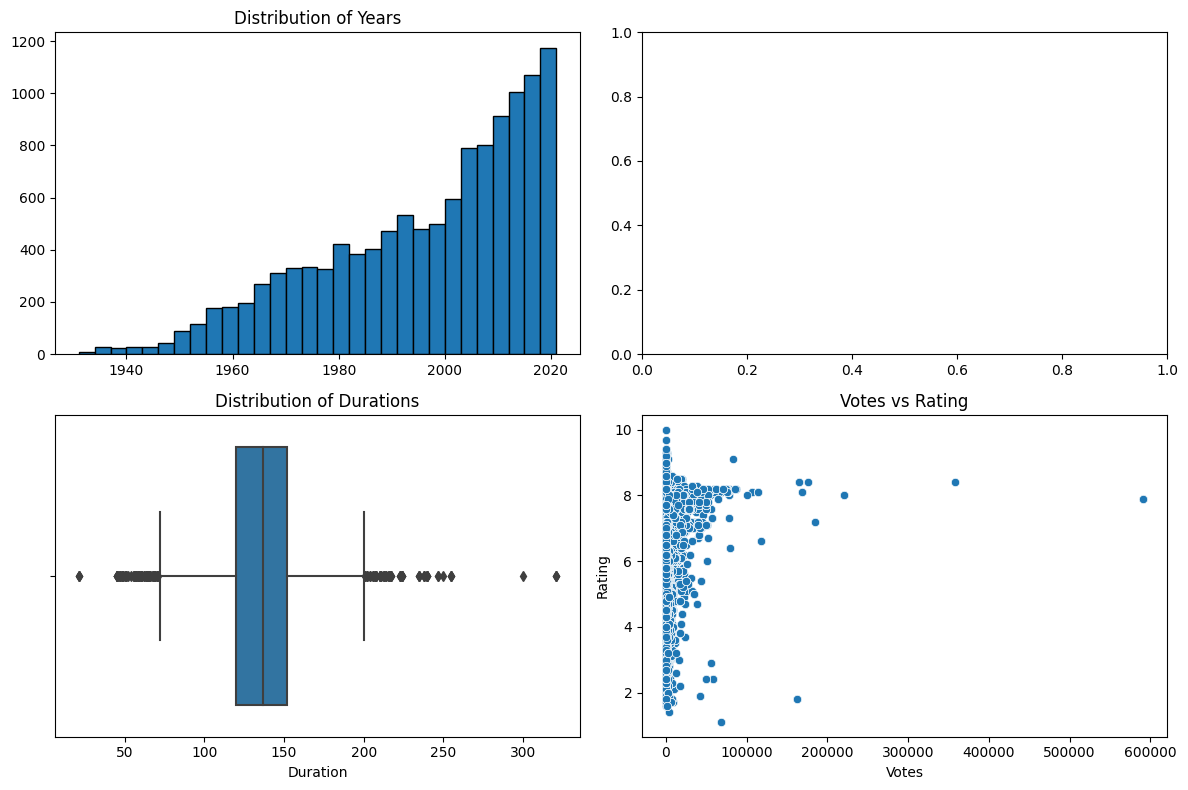

In [ ]:
# Set up the figure and axis objects
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot a histogram of the 'Year' column
axes[0, 0].hist(df['Year'], bins=30, edgecolor='black')
axes[0, 0].set_title('Distribution of Years')

# Plot a boxplot of the 'Duration' column
sns.boxplot(data=df, x='Duration', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Durations')

# Plot a scatter plot of 'Votes' vs 'Rating'
sns.scatterplot(data=df, x='Votes', y='Rating', ax=axes[1, 1])
axes[1, 1].set_title('Votes vs Rating')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

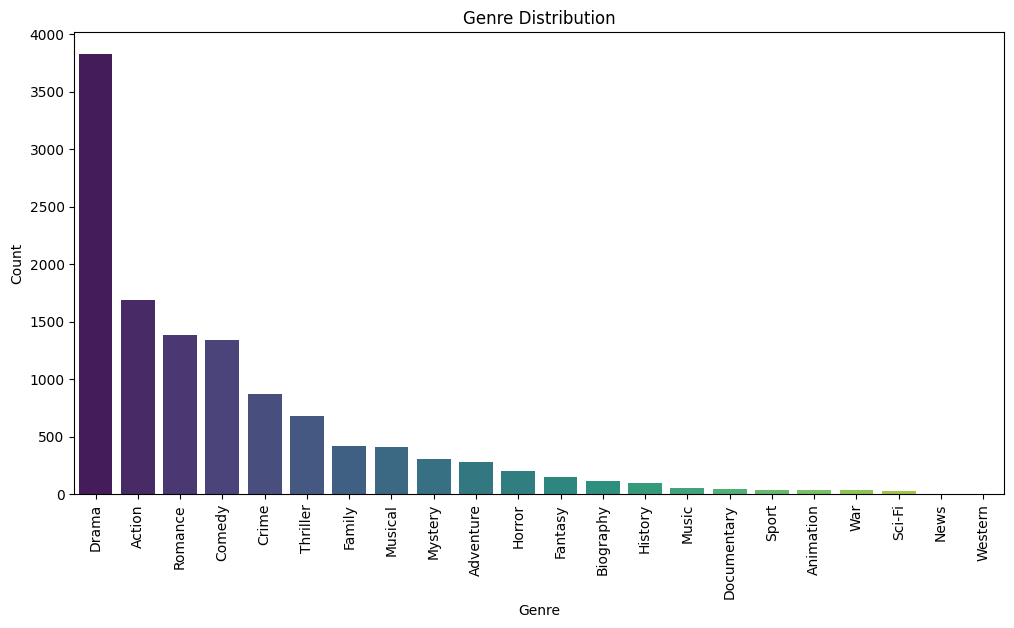

In [ ]:
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

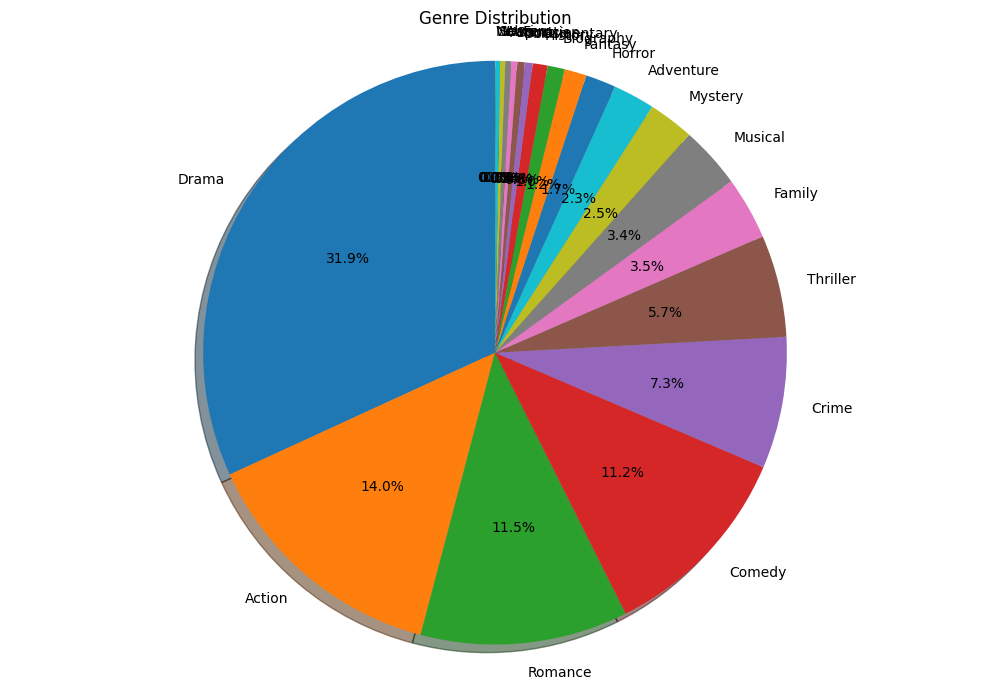

In [ ]:
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(genre_counts, labels=genre_counts.index, startangle=90, autopct='%1.1f%%', shadow=True)
plt.title('Genre Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

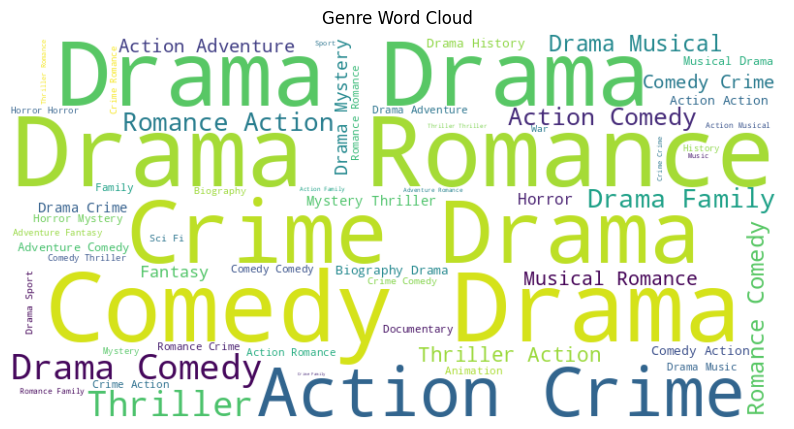

In [ ]:
from wordcloud import WordCloud

genre_text = ' '.join(df['Genre'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

In [ ]:
df.drop('Name', axis = 1, inplace = True)

In [ ]:
df.head()

Year  Duration    Genre  Rating  Votes       Director       Actor 1  \
1  2019       109    Drama     7.0      8  Gaurav Bakshi  Rasika Dugal   
3  2019       110   Comedy     4.4     35     Ovais Khan       Prateik   
3  2019       110  Romance     4.4     35     Ovais Khan       Prateik   
5  1997       147   Comedy     4.7    827   Rahul Rawail    Bobby Deol   
5  1997       147    Drama     4.7    827   Rahul Rawail    Bobby Deol   

                  Actor 2          Actor 3  
1          Vivek Ghamande    Arvind Jangid  
3              Ishita Raj  Siddhant Kapoor  
3              Ishita Raj  Siddhant Kapoor  
5  Aishwarya Rai Bachchan    Shammi Kapoor  
5  Aishwarya Rai Bachchan    Shammi Kapoor

In [ ]:
# One-hot encode genre
genre_dummies = df['Genre'].str.get_dummies(sep=', ')
df = pd.concat([df, genre_dummies], axis=1)

# One-hot encode director
director_dummies = df['Director'].str.get_dummies()
df = pd.concat([df, director_dummies], axis=1)

# One-hot encode actors
actor1_dummies = df['Actor 1'].str.get_dummies()
actor2_dummies = df['Actor 2'].str.get_dummies()
actor3_dummies = df['Actor 3'].str.get_dummies()
actors_dummies = actor1_dummies.add(actor2_dummies, fill_value=0).add(actor3_dummies, fill_value=0)
df = pd.concat([df, actors_dummies], axis=1)

In [ ]:
pd.set_option("display.max_columns", None)
df

Year  Duration    Genre  Rating  Votes         Director       Actor 1  \
1      2019       109    Drama     7.0      8    Gaurav Bakshi  Rasika Dugal   
3      2019       110   Comedy     4.4     35       Ovais Khan       Prateik   
3      2019       110  Romance     4.4     35       Ovais Khan       Prateik   
5      1997       147   Comedy     4.7    827     Rahul Rawail    Bobby Deol   
5      1997       147    Drama     4.7    827     Rahul Rawail    Bobby Deol   
...     ...       ...      ...     ...    ...              ...           ...   
15503  1989       125    Drama     5.8     44  S.P. Muthuraman   Chiranjeevi   
15505  1999       129   Action     4.5    655       Kuku Kohli  Akshay Kumar   
15505  1999       129    Drama     4.5    655       Kuku Kohli  Akshay Kumar   
15508  1998       130   Action     6.2     20     K.C. Bokadia    Dharmendra   
15508  1998       130    Drama     6.2     20     K.C. Bokadia    Dharmendra   

                      Actor 2          Actor 3  Action  Adventure  Animation  \
1              Vivek Ghamande    Arvind Jangid       0          0          0   
3                  Ishita Raj  Siddhant Kapoor       0          0          0   
3                  Ishita Raj  Siddhant Kapoor       0          0          0   
5      Aishwarya Rai Bachchan    Shammi Kapoor       0          0          0   
5      Aishwarya Rai Bachchan    Shammi Kapoor       0          0          0   
...                       ...              ...     ...        ...        ...   
15503              Jayamalini      Rajinikanth       0          0          0   
15505          Twinkle Khanna      Aruna Irani       1          0          0   
15505          Twinkle Khanna      Aruna Irani       0          0          0   
15508              Jaya Prada      Arjun Sarja       1          0          0   
15508              Jaya Prada      Arjun Sarja       0          0          0   

       Biography  Comedy  Crime  Documentary  Drama  Family  Fantasy  History  \
1              0       0      0            0      1       0        0        0   
3              0       1      0            0      0       0        0        0   
3              0       0      0            0      0       0        0        0   
5              0       1      0            0      0       0        0        0   
5              0       0      0            0      1       0        0        0   
...          ...     ...    ...          ...    ...     ...      ...      ...   
15503          0       0      0            0      1       0        0        0   
15505          0       0      0            0      0       0        0        0   
15505          0       0      0            0      1       0        0        0   
15508          0       0      0            0      0       0        0        0   
15508          0       0      0            0      1       0        0        0   

       Horror  Music  Musical  Mystery  News  Romance  Sci-Fi  Sport  \
1           0      0        0        0     0        0       0      0   
3           0      0        0        0     0        0       0      0   
3           0      0        0        0     0        1       0      0   
5           0      0        0        0     0        0       0      0   
5           0      0        0        0     0        0       0      0   
...       ...    ...      ...      ...   ...      ...     ...    ...   
15503       0      0        0        0     0        0       0      0   
15505       0      0        0        0     0        0       0      0   
15505       0      0        0        0     0        0       0      0   
15508       0      0        0        0     0        0       0      0   
15508       0      0        0        0     0        0       0      0   

       Thriller  War  Western  A. Bhimsingh  A. Jagannathan  A. Majid  \
1             0    0        0             0               0         0   
3             0    0        0             0               0         0   
3             0    0        

In [ ]:
df.drop("Genre", axis = 1, inplace = True)
df.drop("Director", axis = 1, inplace = True)
df.drop("Actor 1", axis = 1, inplace = True)
df.drop("Actor 2", axis = 1, inplace = True)
df.drop("Actor 3", axis = 1, inplace = True)

In [ ]:
df.columns

Index(['Year', 'Duration', 'Rating', 'Votes', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime',
       ...
       'Zeishan Quadri', 'Zenia Starr', 'Zenobia Shroff', 'Zhangke Jia',
       'Zoa Morani', 'Zoya Afroz', 'Zoya Hussain', 'Zubeida', 'Zuber K. Khan',
       'Zulfi Sayed'],
      dtype='object', length=7538)

In [ ]:
df.head()

Year  Duration  Rating  Votes  Action  Adventure  Animation  Biography  \
1  2019       109     7.0      8       0          0          0          0   
3  2019       110     4.4     35       0          0          0          0   
3  2019       110     4.4     35       0          0          0          0   
5  1997       147     4.7    827       0          0          0          0   
5  1997       147     4.7    827       0          0          0          0   

   Comedy  Crime  Documentary  Drama  Family  Fantasy  History  Horror  Music  \
1       0      0            0      1       0        0        0       0      0   
3       1      0            0      0       0        0        0       0      0   
3       0      0            0      0       0        0        0       0      0   
5       1      0            0      0       0        0        0       0      0   
5       0      0            0      1       0        0        0       0      0   

   Musical  Mystery  News  Romance  Sci-Fi  Sport  Thriller  War  Western  \
1        0        0     0        0       0      0         0    0        0   
3        0        0     0        0       0      0         0    0        0   
3        0        0     0        1       0      0         0    0        0   
5        0        0     0        0       0      0         0    0        0   
5        0        0     0        0       0      0         0    0        0   

   A. Bhimsingh  A. Jagannathan  A. Majid  A. Muthu  A. Salaam  A. Shamsheer  \
1             0               0         0         0          0             0   
3             0               0         0         0          0             0   
3             0               0         0         0          0             0   
5             0               0         0         0          0             0   
5             0               0         0         0          0             0   

   A. Veerappan  A.C. Trilogchander  A.K. Bir  A.L. Vijay  A.M.R. Ramesh  \
1             0                   0         0           0              0   
3             0                   0         0           0              0   
3             0                   0         0           0              0   
5             0                   0         0           0              0   
5             0                   0         0           0              0   

   A.P. Nagarajan  A.P. Subbaraav  A.R. Murugadoss  A.T. Joy  A.T. Raghu  \
1               0               0                0         0           0   
3               0               0                0         0           0   
3               0               0                0         0           0   
5               0               0                0         0           0   
5               0               0                0         0           0   

   Aadish Keluskar  Aakkoo  Aamir Bashir  Aamir Khan  Aamreeta Gautam  \
1                0       0             0           0                0   
3                0       0             0           0                0   
3                0       0             0           0                0   
5                0       0             0           0                0   
5                0       0             0           0                0   

   Aanand L. Rai  Aanand Raut  Aarif Sheikh  Aarti S. Bagdi  Aarun Nagar  \
1              0            0             0               0            0   
3              0            0             0               0            0   
3              0            0             0               0            0   
5              0            0             0               0            0   
5              0            0             0               0            0   

   Aaryaan Saxena  Aashish Chanana  Aatish Kapadia  Aban Bharucha Deohans  \
1               0                0               0                      0   
3               0                0               0                      0   
3               0                0               0                  

#### **Applying Linear Regression ML Model**

In [ ]:
# Columns to include in X (all columns except Rating column)
X = df.drop('Rating', axis=1)

# Column to include in y (Rating column)
y = df['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Applying Random Forest Regressor ML Model**

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

In [ ]:
print('Using Random Forest Regressor:\n')

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Using Random Forest Regressor:

Mean Squared Error: 0.43536847085761865
R-squared: 0.7627537194631502
Mean Absolute Error: 0.4208363863447127
Mean Squared Error: 0.43536847085761865
Root Mean Squared Error: 0.659824575821194


In [ ]:
print('R2 score: ',r2_score(y_test, y_pred))

R2 score:  0.7627537194631502


In [ ]:
print(y_pred)

[5.14  7.345 5.21  ... 8.063 5.48  5.571]


In [ ]:
df.to_csv('imdb_Indian_Movies_Preprocessed_data.csv', index=False)

In [614]:
from google.colab import files
files.download('imdb_Indian_Movies_Preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [672]:
import joblib

joblib.dump(rfr, 'rfr_model.pkl')

['rfr_model.pkl']

#### **Checking on unseen data**

In [638]:
unseendf= df.sample(1)

In [639]:
unseendf

Year  Duration  Rating  Votes  Action  Adventure  Animation  Biography  \
12658  2019        47     6.5     32       0          0          0          0   

       Comedy  Crime  Documentary  Drama  Family  Fantasy  History  Horror  \
12658       0      0            0      1       0        0        0       0   

       Music  Musical  Mystery  News  Romance  Sci-Fi  Sport  Thriller  War  \
12658      0        0        0     0        0       0      0         0    0   

       Western  A. Bhimsingh  A. Jagannathan  A. Majid  A. Muthu  A. Salaam  \
12658        0             0               0         0         0          0   

       A. Shamsheer  A. Veerappan  A.C. Trilogchander  A.K. Bir  A.L. Vijay  \
12658             0             0                   0         0           0   

       A.M.R. Ramesh  A.P. Nagarajan  A.P. Subbaraav  A.R. Murugadoss  \
12658              0               0               0                0   

       A.T. Joy  A.T. Raghu  Aadish Keluskar  Aakkoo  Aamir Bashir  \
12658         0           0                0       0             0   

       Aamir Khan  Aamreeta Gautam  Aanand L. Rai  Aanand Raut  Aarif Sheikh  \
12658           0                0              0            0             0   

       Aarti S. Bagdi  Aarun Nagar  Aaryaan Saxena  Aashish Chanana  \
12658               0            0               0                0   

       Aatish Kapadia  Aban Bharucha Deohans  Abbas Alibhai Burmawalla  \
12658               0                      0                         0   

       Abbas Tyrewala  Abdul Qayyoom Khan  Abdul Rashid Kardar  Abdul Sattar  \
12658               0                   0                    0             0   

       Abhay Chhabra  Abhay Chopra  Abhigyan Jha  Abhijeet Kumar  \
12658              0             0             0               0   

       Abhijit Kokate  Abhijit Panse  Abhimanyu Chauhan  Abhinav Kashyap  \
12658               0              0                  0                0   

       Abhinav Shiv Tiwari  Abhinav Thakur  Abhinay Deo  Abhiraj Minawala  \
12658                    0               0            0                 0   

       Abhiram  Abhishek Chaubey  Abhishek Chhadha  Abhishek Dixit  \
12658        0                 0                 0               0   

       Abhishek Dogra  Abhishek Jain  Abhishek Jawkar  Abhishek Kapoor  \
12658               0              0                0                0   

       Abhishek Pathak  Abhishek Saxena  Abhishek Sharma  \
12658                0                0                0   

       Abhishek Utkarsh Deokar  Abhishek Varman  Abir Sengupta  Abrar  \
12658                        0                0              0      0   

       Abrar Alvi  Adam Avil  Adam Dow  Adarsh Eshwarappa  Adarsh Jain  \
12658           0          0         0                  0            0   

       Adeeb Rais  Adi Irani  Aditi Roy  Aditya Bhattacharya  Aditya Chopra  \
12658           0          0          0                    0              0   

       Aditya Datt  Aditya Dhar  Aditya Kripalani  Aditya Om  \
12658            0            0                 0          0   

       Aditya Sarpotdar  Aditya Warang  Adurthi Subba Rao  Advait Chandan  \
12658                 0              0                  0               0   

       Afzal Ahmad  Agneya Singh  Agrawal Mukesh Narayan  Ahathian  \
12658            0             0                       0         0   

       Ahishor Solomon  Ahmed Khan  Aijaz Khan  Ajai Sinha  Ajay Bahl  \
12658                0           0           0           0          0   

       Ajay Bhuyan  Ajay Chandhok  Ajay Devaloka  Ajay Devgn  Ajay Govind  \
12658            0              0              0           0            0   

       Ajay K Saklani  Ajay Karthik  Ajay Kashyap  Ajay Kumar  Ajay Lohan  \
12658               0             0             0           0           0   

       Ajay Mehra  Ajay Naik  Ajay Pannalal  Ajay Phansekar  Ajay Yadav  \
12658           0          0            

In [660]:
unseendf.to_csv('imdb_Indian_Movies_Unseen_data.csv', index=False)

In [678]:
testdf = pd.read_csv('imdb_Indian_Movies_Unseen_data.csv')

In [679]:
testdf.columns = testdf.columns.str.replace('.1', '')

<ipython-input-679-e14da94a4f78>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  testdf.columns = testdf.columns.str.replace('.1', '')


In [681]:
testdf.drop("Rating", axis = 1, inplace = True)

In [682]:
RandomForestRegressorModel = joblib.load('rfr_model.pkl')

In [684]:
RandomForestRegressorModel.predict(testdf)

array([6.94])

In [683]:
predict_rating = RandomForestRegressorModel.predict(testdf)

print("Predicted Rating:", predict_rating[0])

Predicted Rating: 6.94
